Assignment #01 (Chapter #1 and #2)

Submitted by Wania Naeem, 22i-2369 of CS-Z (Robo)

For this assignment, I have used a public dataset from Kaggle: Road Accidents in UK (2000 - 2018). It has over 1.8 million features and 33 features with majorly numerical features and some categorical features. The details on this dataset and model will be provided in the report.

This assignment is going to predict the severity of the accidents in UK based on the data.

<p align="left">
  <a href="https://colab.research.google.com/github/Wania-n/ML_A-01_Road-Accidents-UK/blob/main/22i-2369_ML_A1.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" height="30">
  </a>
  <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/Wania-n/ML_A-01_Road-Accidents-UK/main/22i-2369_ML_A1.ipynb">
    <img src="https://kaggle.com/static/images/open-in-kaggle.svg" height="30">
  </a>
</p>

1. Installing the Kaggle API (Run this if not installed!)

In [ ]:
!pip install kaggle

2. Downloading the Dataset from Kaggle

In [1]:
import os

# This is the dataset name from kaggle
dataset_name = "devansodariya/road-accident-united-kingdom-uk-dataset"
download_path = "datasets"

# Make the folder and run the downloading command
os.makedirs(download_path, exist_ok=True)
os.system(f"kaggle datasets download -d {dataset_name} -p {download_path} --unzip")

# After running this cell, a folder named 'datasets' will be created in the directory as this file.
# The dataset will be downloaded in that folder and be named 'UK_Accident.csv' of 449.67 MBs

1

3. Extracting the Dataset into the code

In [2]:
import pandas as pd

# Reading the dataset using pandas, ignoring the first column, because it is an index column
dataset = pd.read_csv("datasets/UK_Accident.csv", index_col=0)

# Due to the large values, I limited the decimal places to 4 to easily understand the data
pd.set_option('display.float_format', '{:.4f}'.format)


4. Describing the data

In [3]:
# Describing the Dataset
dataset.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1504049.0000,1504150.0000,1504049.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000,1504150.0000
mean,439621.4051,300138.2491,-1.4366,52.5859,30.2054,2.8382,1.8316,1.3510,4.1186,347.6149,4.0880,1009.9191,39.0054,2.6751,381.5684,1.3539,2009.3697
std,95116.1603,161021.7621,1.3981,1.5125,25.5160,0.4018,0.7148,0.8253,1.9244,259.4292,1.4289,1823.5177,14.1399,3.2055,1302.5546,0.4784,3.0135
min,64950.0000,0.0000,-7.5162,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-1.0000,10.0000,-1.0000,-1.0000,1.0000,2005.0000
25%,375060.0000,178260.0000,-2.3739,51.4901,6.0000,3.0000,1.0000,1.0000,2.0000,110.0000,3.0000,0.0000,30.0000,-1.0000,0.0000,1.0000,2006.0000
50%,439960.0000,268800.0000,-1.4037,52.3089,30.0000,3.0000,2.0000,1.0000,4.0000,322.0000,4.0000,129.0000,30.0000,3.0000,0.0000,1.0000,2010.0000
75%,523060.0000,398150.0000,-0.2215,53.4786,45.0000,3.0000,2.0000,1.0000,6.0000,518.0000,6.0000,725.0000,50.0000,6.0000,0.0000,2.0000,2012.0000
max,655370.0000,1208800.0000,1.7594,60.7575,98.0000,3.0000,67.0000,93.0000,7.0000,941.0000,6.0000,9999.0000,70.0000,6.0000,9999.0000,3.0000,2014.0000


In [4]:
# Checking the first 5 rows of the dataset
print(dataset.head())

  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001            525680.0000             178240.0000    -0.1912   
1  200501BS00002            524170.0000             181650.0000    -0.2117   
2  200501BS00003            524520.0000             182240.0000    -0.2065   
3  200501BS00004            526900.0000             177530.0000    -0.1739   
4  200501BS00005            528060.0000             179040.0000    -0.1566   

   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0   51.4891             1                  2                   1   
1   51.5201             1                  3                   1   
2   51.5253             1                  3                   2   
3   51.4824             1                  3                   1   
4   51.4958             1                  3                   1   

   Number_of_Casualties        Date  ...  \
0                     1  04/01/2005  ...   
1                     1  05/01/200

In [5]:
# Checking the datatypes of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504150 entries, 0 to 464696
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504150 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504150 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1504150

-> Describing Dataset Summary

Some of features, hold little to no extensive information of the dataset so its best to have them removed from the dataset. These datasets include: Special_Conditions_At_Site (it is a categorical feature with 98% values at None), Carriageway_Hazards (categorical feature with 98% None values); Pedestrian_Crossing (99% has the same value - None within 50 metres).

5. Visualization of Dataset

<Figure size 1500x800 with 0 Axes>

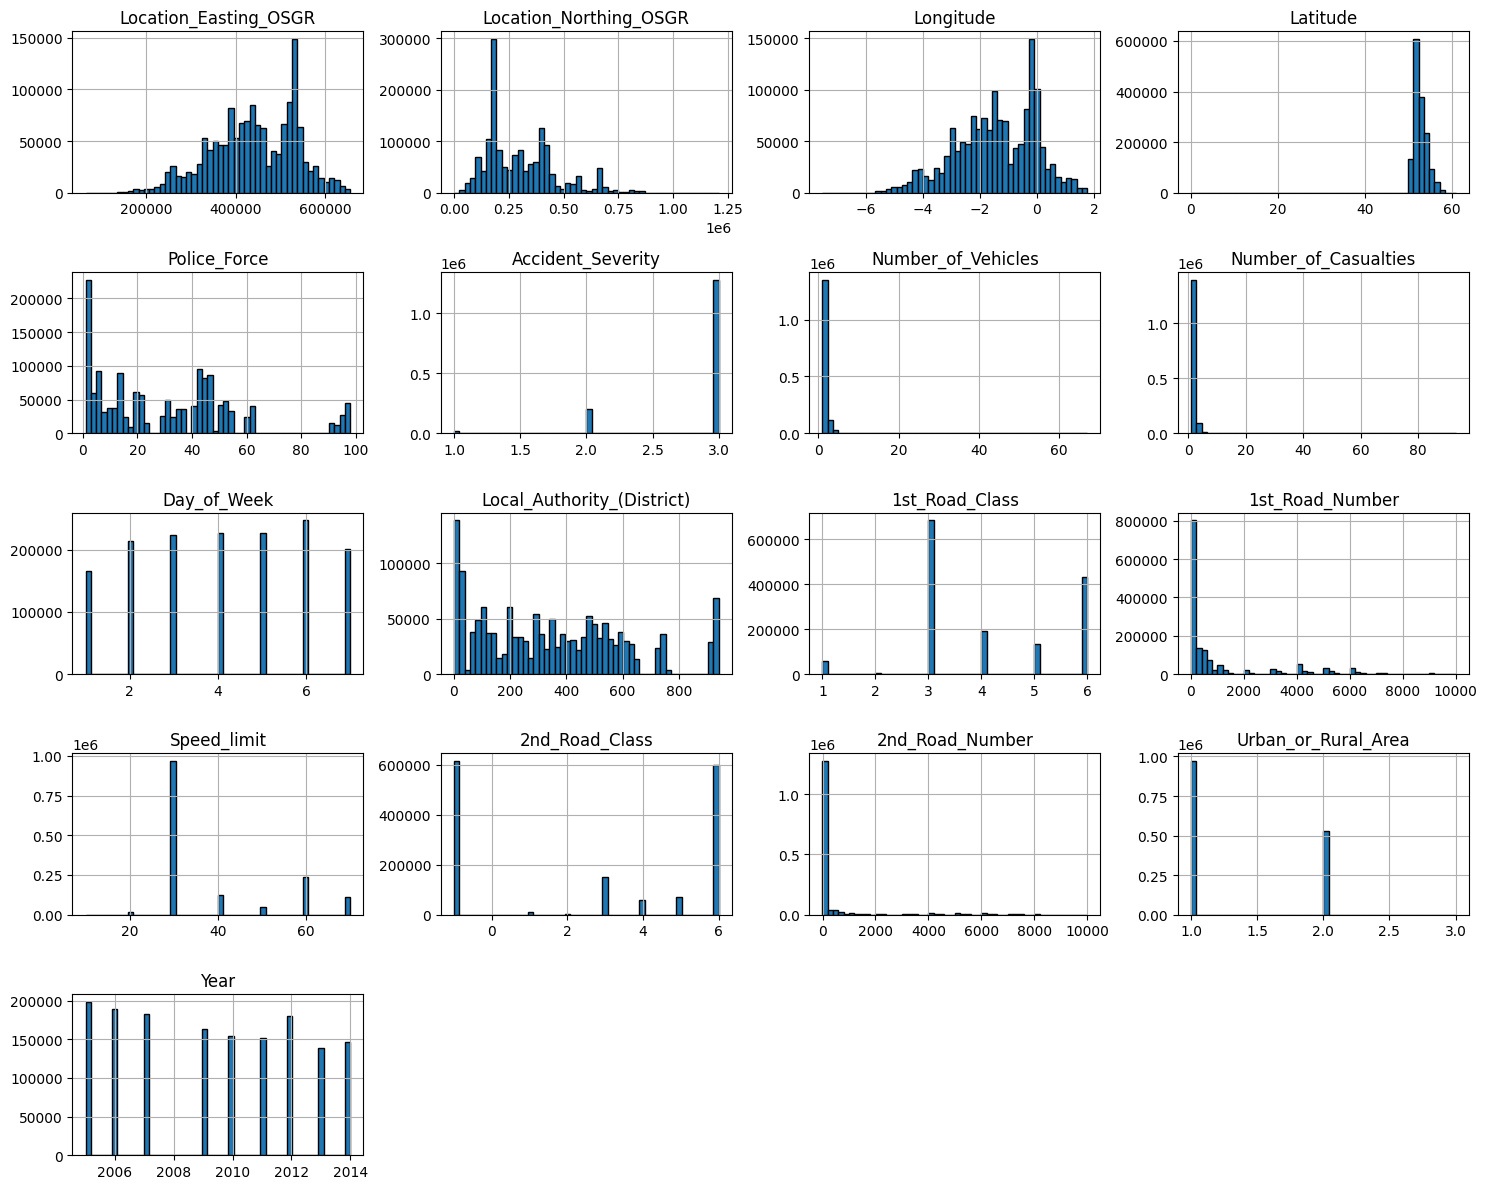

In [6]:
# Numerical Data Visualization (Histograms)

import matplotlib.pyplot as plt

# Plotting and saving the image
plt.figure(figsize=(15, 8))
dataset.hist(bins=50, figsize=(15, 12), edgecolor='black')
plt.tight_layout()
plt.savefig("UK_Accident_Numerical_Plots.png", dpi=300, bbox_inches="tight")
plt.show()


-> Numerical Data Visualization Summary

Now from the numercial feature visualization, there are some features that have been made into a numercial feature, but they are best suited as a categorical feature. For eg: Day_of_Week (1 -7), should be described as Sunday - Saturday; Urban_or_Rural_Area needs to be categorical as well, there are only 3 values in that feature (1, 2, 3); Year is treated as a numerical feature; Accident_Severity is treated as (1, 2, 3), they should be converted to categorical too.

This is to make sure that the model doesn't extract the integar value of the dataset but rather the classical value which can be further done by one-hot encoding.

6. Data Preprocessing

Now, before correlation matrix and scatter plots can be made, we need to rmove the unneccesary features, fill in null values and convert categorical values to numerical values.

-----> Dropping Useless Features

In [ ]:
# I am going to drop Special_Conditions_At_Site, Carriageway_Hazards, Pedestrian_Crossing-Human_Control, LSOA_Of_Accident_Location.

dataset.drop(['Special_Conditions_at_Site', 'Carriageway_Hazards', 'Pedestrian_Crossing-Human_Control', 'LSOA_of_Accident_Location'], axis=1, inplace=True)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1504150 entries, 0 to 464696
Data columns (total 28 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504150 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504150 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1504150

In [ ]:
# Fixing the null values in the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 1504150 entries, 0 to 464696
Data columns (total 28 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504150 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504150 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1504150